# Preparation of data for learning
See Géron, A. (2017). *Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems.* " O'Reilly Media, Inc.".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
accidents = '../data/fifa/fifa_2019.csv'
A = pd.read_csv(accidents, low_memory=False, index_col=0)
attributes = ['Name', 'Age', 'Club', 'Position', 
              'Overall', 'International Reputation', 'Height', 'Weight', 'Value']
T = A[attributes]

In [4]:
T.head()

,Name,Age,Club,Position,Overall,International Reputation,Height,Weight,Value
0,L. Messi,31,FC Barcelona,RF,94,5.0,5'7,159lbs,€110.5M
1,Cristiano Ronaldo,33,Juventus,ST,94,5.0,6'2,183lbs,€77M
2,Neymar Jr,26,Paris Saint-Germain,LW,92,5.0,5'9,150lbs,€118.5M
3,De Gea,27,Manchester United,GK,91,4.0,6'4,168lbs,€72M
4,K. De Bruyne,27,Manchester City,RCM,91,4.0,5'11,154lbs,€102M


# Get usable numeric values

In [5]:
def feet_to_cm(f):
    try:
        parts = f.split("'")
        c = int(parts[0])*30.48 + int(parts[1])*2.54
    except:
        c = np.nan
    return c

def lbs_to_kg(l):
    try:
        w = int(l.replace('lbs', ''))
        v = round(w*0.453592, 2)
    except:
        v = np.nan
    return v

def value_to_m(v):
    v = float(v.replace('€', '').replace('M', '').replace('K', ''))
    return v

In [6]:
T.loc[:,'Height'] = T['Height'].apply(lambda x: feet_to_cm(x))
T.loc[:,'Weight'] = T['Weight'].apply(lambda x: lbs_to_kg(x))
T.loc[:,'Value'] = T['Value'].apply(lambda x: value_to_m(x))
T.loc[:,'Position'] = T['Position'].astype(str)

In [7]:
T.head()

,Name,Age,Club,Position,Overall,International Reputation,Height,Weight,Value
0,L. Messi,31,FC Barcelona,RF,94,5.0,170.18,72.12,110.5
1,Cristiano Ronaldo,33,Juventus,ST,94,5.0,187.96,83.01,77.0
2,Neymar Jr,26,Paris Saint-Germain,LW,92,5.0,175.26,68.04,118.5
3,De Gea,27,Manchester United,GK,91,4.0,193.04,76.20,72.0
4,K. De Bruyne,27,Manchester City,RCM,91,4.0,180.34,69.85,102.0


## Explore data

In [8]:
T['Position'].value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
nan      60
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

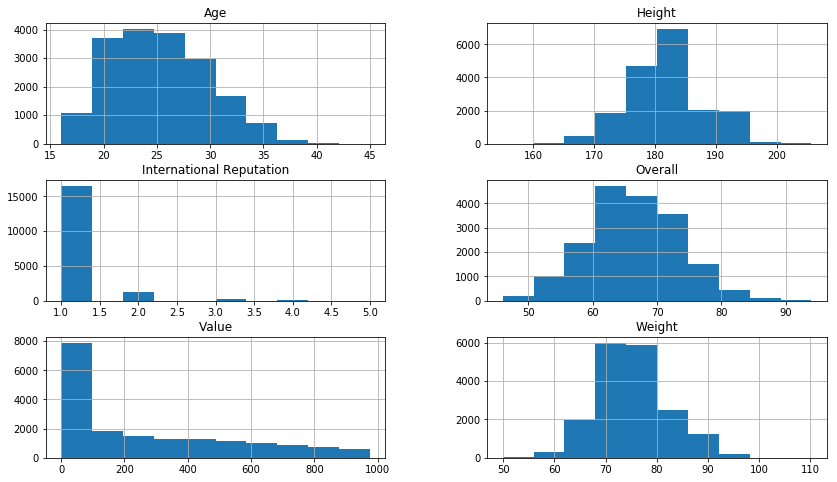

In [9]:
T.hist(figsize=(14,8))
plt.show()

# Create train and test set

## Random approach

In [10]:
def random_split(data, ratio=0.2):
    indexes = np.random.permutation(len(data))
    size = int(len(data) * ratio)
    test_indexes = indexes[:size]
    train_indexes = indexes[size:]
    return data.iloc[train_indexes], data.iloc[test_indexes]

In [11]:
train, test = random_split(T, ratio=0.2)

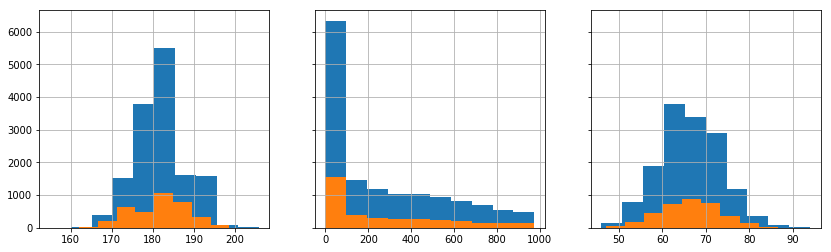

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4), sharey=True)
train.Height.hist(ax=axes[0])
test.Height.hist(ax=axes[0])
train.Value.hist(ax=axes[1])
test.Value.hist(ax=axes[1])
train.Overall.hist(ax=axes[2])
test.Overall.hist(ax=axes[2])
plt.show()

In [13]:
(train['Position'].value_counts() / len(train))[:10]

ST     0.119800
GK     0.110325
CB     0.098448
CM     0.075862
LB     0.072772
RB     0.071536
RM     0.062200
LM     0.059865
CAM    0.052314
CDM    0.051421
Name: Position, dtype: float64

In [14]:
(test['Position'].value_counts() / len(test))[:10]

GK     0.114804
ST     0.111782
CB     0.094480
CM     0.079374
LB     0.071958
RB     0.068388
LM     0.061247
RM     0.059874
CDM    0.054655
CAM    0.053831
Name: Position, dtype: float64

## Stratified split

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

In [16]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [17]:
for train_index, test_index in split.split(T, T.Position.astype(str)):
    s_train = T.iloc[train_index]
    s_test = T.iloc[test_index]

In [18]:
(s_train['Position'].value_counts() / len(s_train))[:10]

ST     0.118229
GK     0.111226
CB     0.097631
CM     0.076553
LB     0.072640
RB     0.070923
RM     0.061723
LM     0.060144
CAM    0.052592
CDM    0.052043
Name: Position, dtype: float64

In [19]:
(s_test['Position'].value_counts() / len(s_test))[:10]

ST     0.118067
GK     0.111203
CB     0.097748
CM     0.076606
LB     0.072488
RB     0.070840
RM     0.061779
LM     0.060132
CAM    0.052718
CDM    0.052169
Name: Position, dtype: float64

# Get insights for data visualization

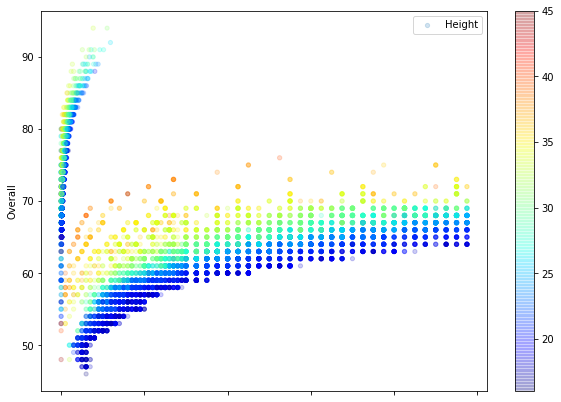

In [20]:
s_train.plot(kind='scatter', x='Value', y='Overall', alpha=0.2, 
             s=s_train.Height / 10, label='Height', figsize=(10,7),
            c=s_train.Age, cmap=plt.get_cmap('jet'), colorbar=True)
plt.show()

# Data correlations

In [21]:
s_train.corr()

,Age,Overall,International Reputation,Height,Weight,Value
Age,1.000000,0.453188,0.249307,0.078488,0.231028,-0.048195
Overall,0.453188,1.000000,0.500928,0.038584,0.157068,-0.230183
International Reputation,0.249307,0.500928,1.000000,0.029474,0.083922,-0.206389
Height,0.078488,0.038584,0.029474,1.000000,0.755083,-0.003571
Weight,0.231028,0.157068,0.083922,0.755083,1.000000,-0.018487
Value,-0.048195,-0.230183,-0.206389,-0.003571,-0.018487,1.000000


In [22]:
from pandas.plotting import scatter_matrix

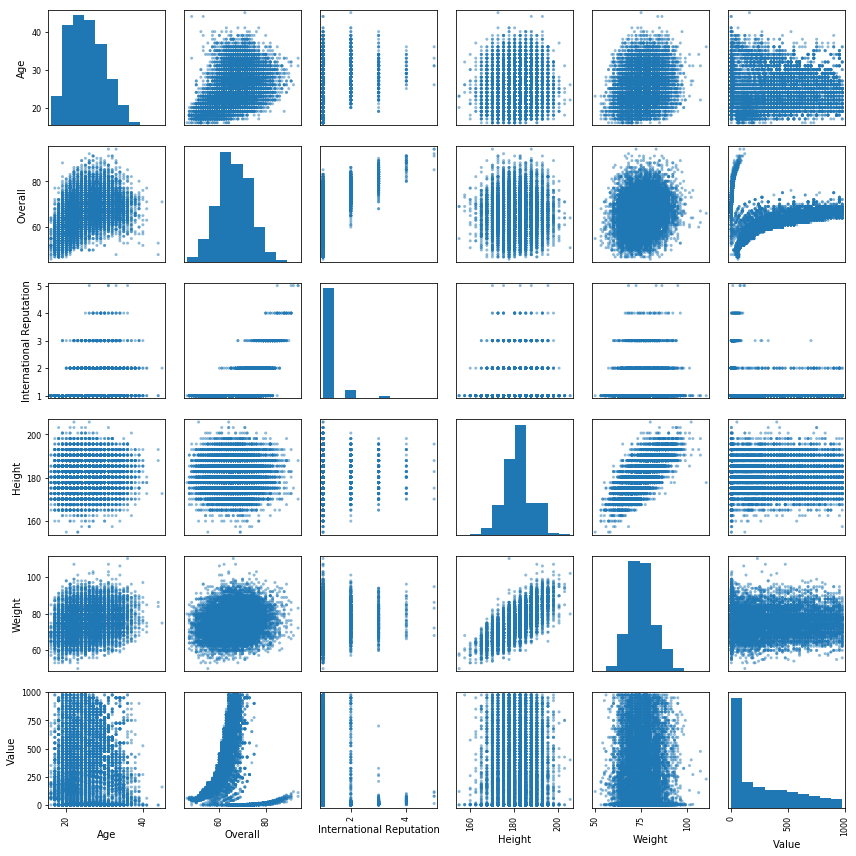

In [23]:
scatter_matrix(s_train, figsize=(12, 12))
plt.tight_layout()
plt.show()

## Data cleaning
Data cleaning mainly deals with substitution of NaN and Null values with median values or by dropping the rows.
A general solution if to use something line the following DataCleaner class.

In [45]:
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.impute import SimpleImputer


class DataCleaner(object):
    
    def __init__(self, strategy='median', text_attributes=None):
        """
        :param text_attributes: columns not containing numerical values
        """
        self.imputer = SimpleImputer(strategy=strategy)
        self.text_attributes = text_attributes
        
    def fit(self, df):
        if self.text_attributes is not None:
            dfc = df.drop(self.text_attributes, axis=1)
        else:
            dfc = df.copy()
        self.imputer.fit(dfc)
        
    def transform(self, df, y=None):
        if self.text_attributes is not None:
            text = df[self.text_attributes].copy()
            dfc = df.drop(self.text_attributes, axis=1)
        else:
            text = None
            dfc = df.copy()
        dfc = pd.DataFrame(self.imputer.transform(dfc), columns=dfc.columns, index=dfc.index)
        if text is not None:
            dfc = dfc.join(text)
        return dfc
        
    def fit_transform(self, df, y=None):
        """
        :param pandas dataframe df: the dataframe
        """
        self.fit(df)
        return self.transform(df)
    
    
class CategoricalData(object):
    
    def __init__(self, text_attribute):
        """
        :param text_attributes: columns not containing numerical values
        """
        self.encoder = LabelBinarizer()
        self.text_attribute = text_attribute
    
    def fit(self, df):
        self.encoder.fit(df[self.text_attribute].copy())
        
    def transform(self, df, y=None):
        """
        :param pandas dataframe df: the dataframe
        :param y: see https://goo.gl/PeoVZ1
        """
        data = df[self.text_attribute].copy()
        dfc = df.drop(self.text_attribute, axis=1)
        hc = self.encoder.fit_transform(data)
        for i, col in enumerate(self.encoder.classes_):
            dfc[col] = hc[:,i]
        return dfc
    
    def fit_transform(self, df, y=None):
        """
        :param y: see https://goo.gl/PeoVZ1
        """
        return self.transform(df)

In [48]:
cleaner = DataCleaner(text_attributes=['Name', 'Club', 'Position'])
categories = CategoricalData(text_attribute=['Position'])

In [49]:
K = cleaner.fit_transform(T)
K = categories.fit_transform(K)

In [50]:
K.head()

,Age,Overall,International Reputation,Height,Weight,Value,Name,Club,CAM,CB,...,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,nan
0,31.0,94.0,5.0,170.18,72.12,110.5,L. Messi,FC Barcelona,0,0,...,0,0,0,1,0,0,0,0,0,0
1,33.0,94.0,5.0,187.96,83.01,77.0,Cristiano Ronaldo,Juventus,0,0,...,0,0,0,0,0,0,0,0,1,0
2,26.0,92.0,5.0,175.26,68.04,118.5,Neymar Jr,Paris Saint-Germain,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27.0,91.0,4.0,193.04,76.20,72.0,De Gea,Manchester United,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27.0,91.0,4.0,180.34,69.85,102.0,K. De Bruyne,Manchester City,0,0,...,0,1,0,0,0,0,0,0,0,0


In [86]:
N = K[['Weight']]

## Scaling

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [88]:
scaler = StandardScaler()
S = scaler.fit_transform(N)

## Example

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [96]:
L = LinearRegression()
L.fit(S, K.Height)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [98]:
L.predict(S)[100]

189.07869579167928

In [99]:
K.iloc[100].Height

187.96

In [101]:
mean_squared_error(K.Height, L.predict(S))

19.44629754732838